# (연습) 2차원 데이터

**준비사항**

Numpy와 Pandas 라이브러리를 각각 np와 pd라는 별칭으로 불러온다

In [ ]:
import numpy as np
import pandas as pd

`matplotlib.pyplot`은 막대그래프, 히스토그램, 산점도 등 데이터를 그래프로 시각화할 때 필요한
다양한 함수를 제공하는 모듈이다.

In [ ]:
import matplotlib.pyplot as plt

# 그래프 설정
plt.rc('figure', figsize=(10, 6))  # 그래프 크기 지정

**데이터 저장소 디렉토리**

코드에 사용되는 데이터 저장소의 기본 디렉토리를 지정한다.

In [ ]:
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'

**문제 1**

기본 데이터 저장소에 있는 `sc_weir.csv` 파일은
광주광력시에서부터 전라남도 나주를 거쳐 서해까지 이어지는 영산강에 설치된 승촌보에서 측정한
두 종류의 데이터를 담고 있다.

- `Chl-a`: 녹조 발생의 주요 요인인 클로로필-A의 수치 100개
- `Discharge`: 보에서 방출되는 시간당 방류량 수치 100개

클로로필-A 농도가 높을 수록 수질(water quality)이 나빠지며, 방류량이 많을 수록 클로로필-A 농도는 일반적으로 떨어지며,
두 데이터 사이의 상관관계를 확인하기 위해 수집되었다.

In [ ]:
sc_weir_df = pd.read_csv(data_url+'sc_weir.csv')
sc_weir_df

,Chl-a,Discharge
0,51,25
1,51,25
2,53,24
3,53,24
4,54,22
...,...,...
95,122,9
96,122,9
97,124,49
98,125,9


항목만으로 구성된 넘파이 어레이를 선언한다.

In [ ]:
sc_weir_arr = sc_weir_df.values
sc_weir_arr.shape

(100, 2)

두 데이터를 별도의 어레이로 지정한다.

In [ ]:
chl_a_arr = sc_weir_arr[:, 0]
discharge_arr = sc_weir_arr[:, 1]

(1) 클로로필-A와 시간당 방류량 사이의 공분산을 계산하고 두 데이터 사이의 상관관계를 설명하라.

- 넘파이 활용

In [13]:
import pandas as pd
import numpy as np
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'
sc_weir_df = pd.read_csv(data_url+'sc_weir.csv')
sc_weir_arr = sc_weir_df.values
sc_weir_arr.shape
chl_a_arr = sc_weir_arr[:, 0]
discharge_arr = sc_weir_arr[:, 1]
chl_scores = np.array(sc_weir_df['Chl-a'])
discharge_scores = np.array(sc_weir_df['Discharge'])

cov_mat = np.cov(chl_scores, discharge_scores, ddof=0)
cov_mat

# 클로로필과 방류량 사이의 공분산의 평균이 -66.2198로 음의 상관관계를 나타내는데 이는 x가 높아질수록 y가 낮아진다는 뜻으로, 방류량이 많아질수록 클로로필 수치가 낮아져 수질이 좋아지는 결과로 볼 수 있다.

array([[506.8004, -66.2198],
       [-66.2198,  40.2851]])

- 데이터프레임 활용

In [28]:
import pandas as pd
import numpy as np
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'
sc_weir_df = pd.read_csv(data_url+'sc_weir.csv')
sc_weir_arr = sc_weir_df.values
sc_weir_arr.shape
chl_a_arr = sc_weir_arr[:, 0]
discharge_arr = sc_weir_arr[:, 1]
summary_df = sc_weir_df.copy()
summary_df.cov()

# 클로로필과 방류량 사이의 공분산의 평균이 -66.888로 음의 상관관계를 나타내는데 이는 x가 높아질수록 y가 낮아진다는 뜻으로, 방류량이 많아질수록 클로로필 수치가 낮아져 수질이 좋아지는 결과로 볼 수 있다.

,Chl-a,Discharge
Chl-a,511.919596,-66.888687
Discharge,-66.888687,40.692020


(2) 클로로필-A와 시간당 방류량 사이의 피어슨 상관계수를 계산하고 두 데이터 사이의 선형 상관관계를 설명하라.

- 넘파이 활용

In [22]:
import pandas as pd
import numpy as np
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'
sc_weir_df = pd.read_csv(data_url+'sc_weir.csv')
sc_weir_arr = sc_weir_df.values
sc_weir_arr.shape
chl_a_arr = sc_weir_arr[:, 0]
discharge_arr = sc_weir_arr[:, 1]
chl_scores = np.array(sc_weir_df['Chl-a'])
discharge_scores = np.array(sc_weir_df['Discharge'])

cov_mat = np.cov(chl_scores, discharge_scores, ddof=0)
cov_mat

np.corrcoef(chl_scores, discharge_scores)
# 상관계수가 -0.4634439로 음의 상관계수가 많이는 아니지만 어느정도 상관이 있다는 것으로 볼 수 있다. 즉 방류량이 많을수록 클로로필 수치가 낮아지는 것은 어느정도 상관이 있다고 볼 수 있다.

array([[ 1.       , -0.4634439],
       [-0.4634439,  1.       ]])

- 데이터프레임 활용

In [25]:
import pandas as pd
import numpy as np
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'
sc_weir_df = pd.read_csv(data_url+'sc_weir.csv')
sc_weir_arr = sc_weir_df.values
sc_weir_arr.shape
chl_a_arr = sc_weir_arr[:, 0]
discharge_arr = sc_weir_arr[:, 1]
summary_df = sc_weir_df.copy()

sc_weir_df.corr()

# 상관계수가 -0.4634439로 음의 상관계수가 많이는 아니지만 어느정도 상관이 있다는 것으로 볼 수 있다. 즉 방류량이 많을수록 클로로필 수치가 낮아지는 것은 어느정도 상관이 있다고 볼 수 있다.

,Chl-a,Discharge
Chl-a,1.000000,-0.463444
Discharge,-0.463444,1.000000


(3) x-축을 방류량, y-축을 클로로필-A 수치로 지정한 다음 산점도를 그린다.

- 넘파이 활용

Text(0, 0.5, 'chl-a')

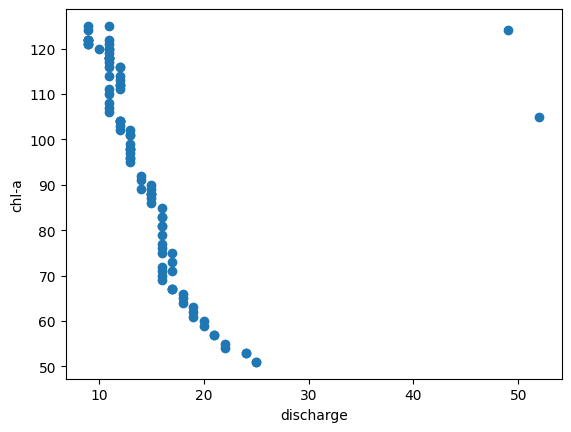

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'
sc_weir_df = pd.read_csv(data_url+'sc_weir.csv')
sc_weir_arr = sc_weir_df.values
sc_weir_arr.shape
chl_a_arr = sc_weir_arr[:, 0]
discharge_arr = sc_weir_arr[:, 1]
chl_scores = np.array(sc_weir_df['Chl-a'])
discharge_scores = np.array(sc_weir_df['Discharge'])

plt.scatter(discharge_scores, chl_scores)
plt.xlabel('discharge')
plt.ylabel('chl-a')




- 데이터프레임 활용

Text(0, 0.5, 'chl-a')

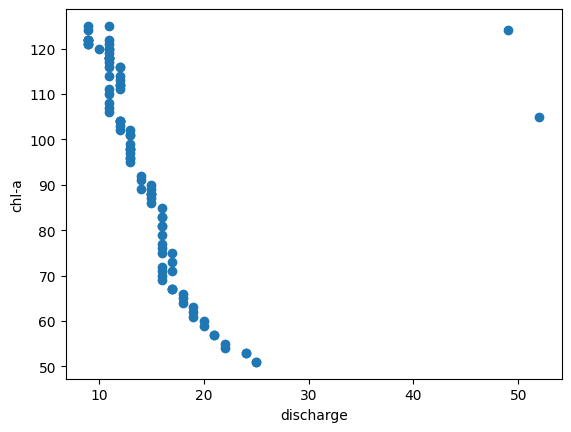

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'
sc_weir_df = pd.read_csv(data_url+'sc_weir.csv')
sc_weir_chl = sc_weir_df['Chl-a']
sc_weir_dis = sc_weir_df['Discharge']

plt.scatter(sc_weir_dis, sc_weir_chl)
plt.xlabel('discharge')
plt.ylabel('chl-a')


(4) 위 산점도에 따르면 두 개의 이상치가 존재한다.
어떤 데이터가 이상치인지 설명하라.

In [ ]:
#산점도 오른쪽 상단에 있는 두개의 데이터가 이상치이다. 두개의 데이터 전부 방류량이 50이상인데 클로로필수치가 120을 넘기고 있어, 음의 상관관계에 맞지않는 데이터이다.

(5) 클로로필-A 데이터와 방수량 두 데이터셋 모두에서 이상치에 해당하는 두 개의 값을 제거한다.

- 데이터프레임 활용

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'
sc_weir_df = pd.read_csv(data_url+'sc_weir.csv')
sc_weir_chl = sc_weir_df['Chl-a']
sc_weir_dis = sc_weir_df['Discharge']
sc_weir_dis
z_chl = zscore(sc_weir_chl)
z_dis = zscore(sc_weir_dis)

# Z-Score가 3 이상 또는 -3 이하인 값을 이상치로 간주
threshold = 3
sc_weir_df_cleaned = sc_weir_df[(abs(z_chl) < threshold) & (abs(z_dis) < threshold)]
#sc_weir_98 = sc_weir_dis.iloc[:102]
#sc_weir_98
#plt.scatter(sc_weir_dis, sc_weir_chl)
#plt.xlabel('discharge')
#plt.ylabel('chl-a')
#sc_weir_df

(6) 이상치를 제거한 두 데이터셋을 이용하여 산점도를 다시 그려본다.

- 데이터프레임 활용

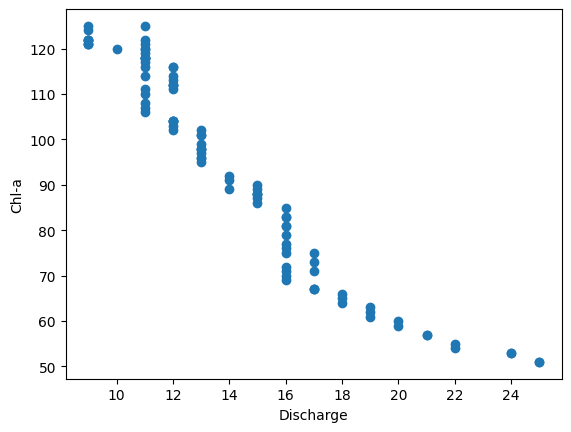

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'
sc_weir_df = pd.read_csv(data_url+'sc_weir.csv')
sc_weir_chl = sc_weir_df['Chl-a']
sc_weir_dis = sc_weir_df['Discharge']
sc_weir_dis
z_chl = zscore(sc_weir_chl)
z_dis = zscore(sc_weir_dis)

# Z-Score가 3 이상 또는 -3 이하인 값을 이상치로 간주
threshold = 3
sc_weir_df_cleaned = sc_weir_df[(abs(z_chl) < threshold) & (abs(z_dis) < threshold)]
plt.scatter(sc_weir_df_cleaned['Discharge'], sc_weir_df_cleaned['Chl-a'])
plt.xlabel('Discharge')
plt.ylabel('Chl-a')
plt.show()

(7) 이상치를 제거하기 이전과 이후의 데이터셋을 이용하여 방류량과 관련하여 아래 값들이 어떻게 달라졌는지 확인한다.
단, 공분산과 피어슨 상관계수는 클로로필-A 데이터와 관련해서 계산한다.

- 평균값
- 중앙값
- 최빈값
- 범위
- 사분범위
- 분산
- 표준편차
- 공분산
- 피어슨 상관계수

힌트: 데이터프레임만 활용

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'
sc_weir_df = pd.read_csv(data_url+'sc_weir.csv')
sc_weir_chl = sc_weir_df['Chl-a']
sc_weir_dis = sc_weir_df['Discharge']
sc_weir_dis
z_chl = zscore(sc_weir_chl)
z_dis = zscore(sc_weir_dis)

# Z-Score가 3 이상 또는 -3 이하인 값을 이상치로 간주
threshold = 3
sc_weir_after_cleaning = sc_weir_df[(abs(z_chl) < threshold) & (abs(z_dis) < threshold)]
#plt.scatter(sc_weir_df_cleaned['Discharge'], sc_weir_df_cleaned['Chl-a'])
#plt.xlabel('Discharge')
#plt.ylabel('Chl-a')
#plt.show()
print("\n### 이상치 제거 이후 ###")
print("\n[이상치 제거 이후] 평균값 (Chl-a):", sc_weir_after_cleaning['Chl-a'].mean())
print("[이상치 제거 이후] 중앙값 (Chl-a):", sc_weir_after_cleaning['Chl-a'].median())
print("[이상치 제거 이후] 최빈값 (Chl-a):", sc_weir_after_cleaning['Chl-a'].mode()[0])
print("[이상치 제거 이후] 범위 (Chl-a):", sc_weir_after_cleaning['Chl-a'].max() - sc_weir_after_cleaning['Chl-a'].min())
print("[이상치 제거 이후] 사분범위 (Chl-a):", sc_weir_after_cleaning['Chl-a'].quantile(0.75) - sc_weir_after_cleaning['Chl-a'].quantile(0.25))
print("[이상치 제거 이후] 분산 (Chl-a):", sc_weir_after_cleaning['Chl-a'].var())
print("[이상치 제거 이후] 표준편차 (Chl-a):", sc_weir_after_cleaning['Chl-a'].std())
print("[이상치 제거 이후] 공분산 (Chl-a, Chl-a):", sc_weir_after_cleaning[['Chl-a', 'Chl-a']].cov().iloc[0,1])
print("[이상치 제거 이후] 피어슨 상관계수 (Chl-a, Chl-a):", sc_weir_after_cleaning[['Chl-a', 'Chl-a']].corr().iloc[0,1])



### 이상치 제거 이후 ###

[이상치 제거 이후] 평균값 (Chl-a): 93.43877551020408
[이상치 제거 이후] 중앙값 (Chl-a): 97.5
[이상치 제거 이후] 최빈값 (Chl-a): 122
[이상치 제거 이후] 범위 (Chl-a): 74
[이상치 제거 이후] 사분범위 (Chl-a): 40.5
[이상치 제거 이후] 분산 (Chl-a): 511.6508520934147
[이상치 제거 이후] 표준편차 (Chl-a): 22.61970053058649
[이상치 제거 이후] 공분산 (Chl-a, Chl-a): 511.65085209341464
[이상치 제거 이후] 피어슨 상관계수 (Chl-a, Chl-a): 1.0


**문제 2**

기본 데이터 저장소에 있는 `california_housing.csv` 파일은 미국 캘리포니아 주의 주택 정보를 담고 있다.
위 파일의 내용을 데이터프레임으로 불러와서 `housing_df` 변수에 할당한다.

In [ ]:
housing_df = pd.read_csv(data_url+"california_housing.csv")
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


(1) 주택중위가격(median_house_value) 특성과 다른 수치형 특성 사이의 선형 상관계수를 나타내는 상관계수를 확인하라.

In [21]:
import pandas as pd
import numpy as np
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'
housing_df = pd.read_csv(data_url+"california_housing.csv")
housing_df
median_np = np.array(housing_df['median_house_value']) # 넘페이 배열
long_np = np.array(housing_df['median_income'])

summary_df = pd.DataFrame({'median_income':long_np, 'median_house_value':median_np})
summary_df.corr()
# longitude = -0.045967
# latitude = -0.014416
# total_rooms = 0.134153
# housing_median_age = 0.105623
# total_bedrooms = 0.049686
# poulation = -0.02465
# households = 0.065843
# median_income = 0.688075  # 제일 상관관게가 높음


,median_income,median_house_value
median_income,1.000000,0.688075
median_house_value,0.688075,1.000000


(2) 확인된 상관계수를 바탕으로 주택중위가격과 가장 상관관계가 높은 특성을 확인하고 그 이유를 추정하라.

힌트: `sort_values()` 메서드 활용

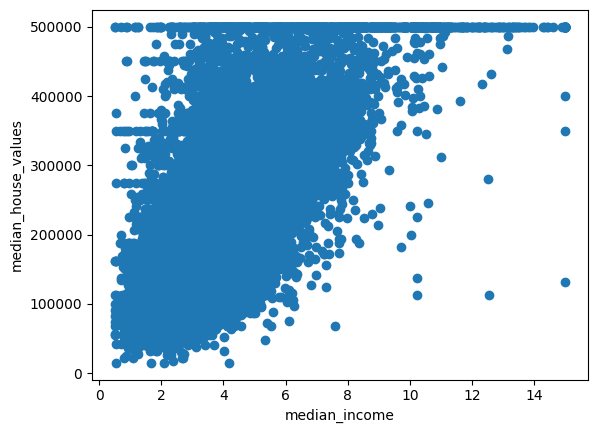

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data_url = 'https://raw.githubusercontent.com/codingalzi/DataSci/refs/heads/master/data/'
housing_df = pd.read_csv(data_url+"california_housing.csv")
housing_df
median_np = np.array(housing_df['median_house_value']) # 넘페이 배열
long_np = np.array(housing_df['median_income'])

summary_df = pd.DataFrame({'median_income':long_np, 'median_house_value':median_np})
summary_df.corr()
# median_income = 0.688075  # 제일 상관관게가 높음

sorted_df = summary_df.sort_values(by='median_income')
sorted_df

plt.scatter(long_np, median_np)
plt.xlabel('median_income')
plt.ylabel('median_house_values')
plt.show()
# 산점도에서도 볼수있듯, 중위소득이 높을수록 주택중위가격이 높은 집에 거주한다는 양의 상관계수를 볼 수 있다.